In [246]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

plt.style.use('seaborn-white')

## Comparing Results of MOOG against Literature Values from exoplanets.org

In [34]:
# Read in Exoplanet Database csv
exo_df = pd.read_csv("pydata/exoplanet_database.csv", skiprows=[1])
print(list(exo_df.columns))

['STAR', 'COMP', 'ORBREF', 'ORBURL', 'RA', 'FIRSTREF', 'FIRSTURL', 'DEC', 'MSTAR', 'MSTARUPPER', 'MSTARLOWER', 'UMSTAR', 'RSTAR', 'RSTARUPPER', 'RSTARLOWER', 'URSTAR', 'DIST', 'DISTUPPER', 'DISTLOWER', 'UDIST', 'TEFF', 'TEFFUPPER', 'TEFFLOWER', 'UTEFF', 'LOGG', 'LOGGUPPER', 'LOGGLOWER', 'ULOGG', 'FE', 'FEUPPER', 'FELOWER', 'UFE']


In [144]:
# Collect list of stellar parameter files
stellar_param_files = glob.glob("pydata/sumout_files/*")

In [210]:
# Generate Stellar Parameter DataFrame
stellar_param_dict = {}
files = ["pydata/sumout_files/11Com_2012.m.sumout"]
for file in stellar_param_files:
    with open(file,'r') as f:
        for i, line in enumerate(f):
            if i == 0:
                star = f.readline().split(" ")[0].split("_")[0]
                #print(star)
                params = [elem for elem in f.readline().split(" ") if elem != '']
                #print(params)
                metallicity = params[-2]
                if '-' in metallicity:
                    metallicity = metallicity[4:]
                file_dict = {'Teff': float(params[2]), 'Log_g':float(params[6]), 'M/H':float(metallicity)}
                #print(file_dict)
                stellar_param_dict[star] = file_dict
                
param_df = pd.DataFrame.from_dict(stellar_param_dict, orient='index')

In [211]:
# Cross Reference the two Dataframes, generate a comparison Dataframe

cross_ref_dict = {}
for row in param_df.iterrows():
    logg, teff, metal = row[1][:]
    exo_df_subset = [s for s in list(exo_df['STAR']) if row[0].lower() in s.replace(' ','').lower()]
    if len(exo_df_subset) == 0:
        continue
    exo_match = exo_df[exo_df['STAR'] == exo_df_subset[0]]
    exo_match = exo_match.head(1) # If there's multiple planets multiple matchs will happen, just take the first one

    delta_teff = abs(teff - float(exo_match['TEFF']))
    delta_logg = abs(logg - float(exo_match['LOGG']))
    delta_metal = abs(metal - float(exo_match['FE']))
    match_dict = {'DELTATEFF': delta_teff, 'DELTALOGG':delta_logg, 'DELTAFE':delta_metal,
                 'UTEFF': float(exo_match['UTEFF']), 'ULOGG': float(exo_match['ULOGG']), 'UFE': float(exo_match['UFE'])}
    cross_ref_dict[row[0]] = match_dict

cross_ref_df = pd.DataFrame.from_dict(cross_ref_dict, orient='index')

Fraction of TEFF Measurements within UTEFF: 0.7105263157894737
Fraction of LOGG Measurements within ULOGG: 0.6842105263157895
Fraction of FE Measurements within UFE: 0.5263157894736842


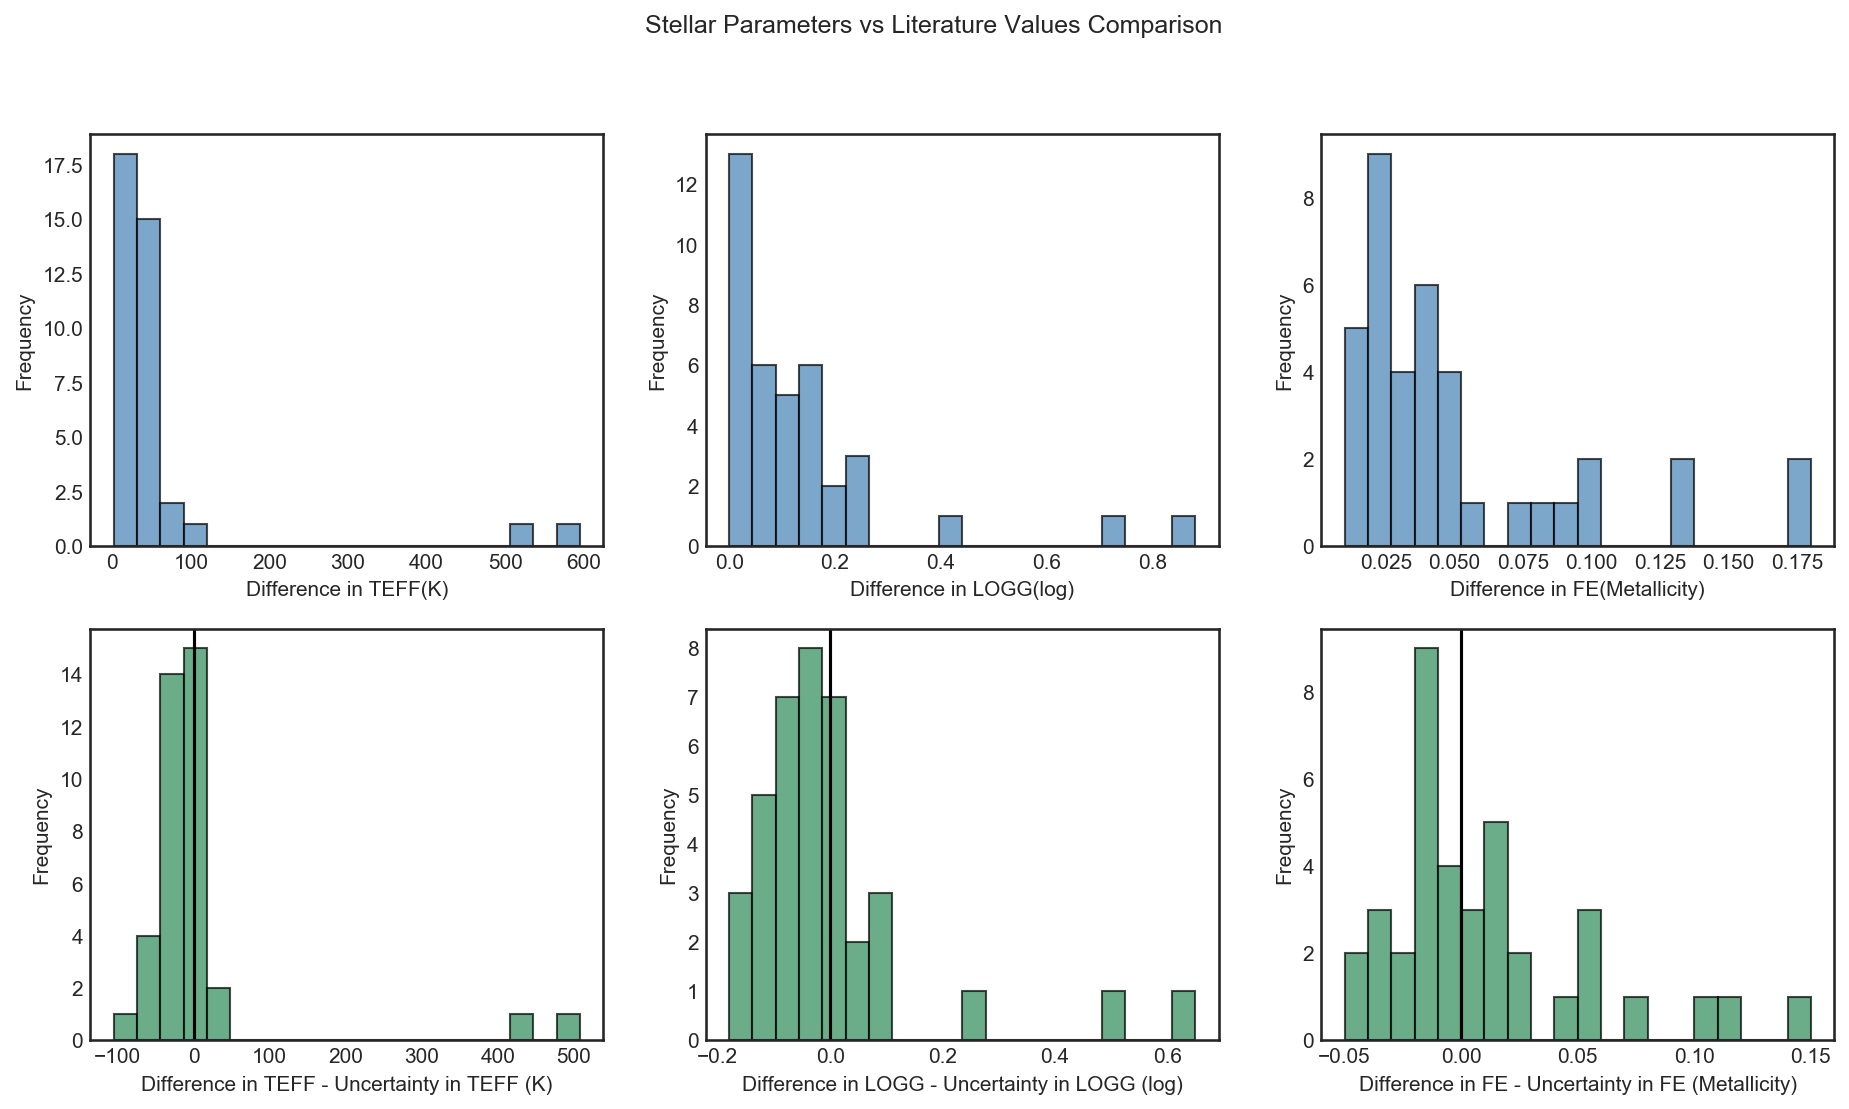

In [276]:
fig, axes = plt.subplots(2,3, figsize=(15,8), dpi = 150)
quantities = ['DELTATEFF', 'DELTALOGG', 'DELTAFE']
uncertainties = ['UTEFF', 'ULOGG', 'UFE']
units = ['K', 'log', 'Metallicity']
for idx,ax in enumerate(axes[0]):
    ax.hist(cross_ref_df[quantities[idx]], histtype='bar',ec='black', color = 'steelblue', alpha = 0.7, bins = 20)
    ax.set_xlabel("Difference in {}({})".format(quantities[idx][5:], units[idx]))
    ax.set_ylabel("Frequency")
    
for idx,ax in enumerate(axes[1]):
    ax.set_xlabel("Difference in {} - Uncertainty in {} ({})".format(quantities[idx][5:],quantities[idx][5:], units[idx]))
    ax.hist(cross_ref_df[quantities[idx]] - cross_ref_df[uncertainties[idx]], histtype='bar',ec='black', color='seagreen', alpha=0.7, bins=20)
    ax.set_ylabel("Frequency")
    ax.axvline(0, color='k')
fig.suptitle("Stellar Parameters vs Literature Values Comparison")
#plt.tight_layout()
plt.savefig("plots/literature_comparison.png")
print("Fraction of TEFF Measurements within UTEFF: {}".format(np.sum((cross_ref_df['DELTATEFF']-cross_ref_df['UTEFF']) <= 0)/ len(list(cross_ref_df['DELTATEFF']))))
print("Fraction of LOGG Measurements within ULOGG: {}".format(np.sum((cross_ref_df['DELTALOGG']-cross_ref_df['ULOGG']) <= 0)/ len(list(cross_ref_df['DELTALOGG']))))
print("Fraction of FE Measurements within UFE: {}".format(np.sum((cross_ref_df['DELTAFE']-cross_ref_df['UFE']) <= 0)/ len(list(cross_ref_df['DELTAFE']))))

In [287]:
print(len(cross_ref_df))
cross_ref_df[['DELTATEFF','UTEFF','DELTALOGG','ULOGG','DELTAFE','UFE']]

38


,DELTATEFF,UTEFF,DELTALOGG,ULOGG,DELTAFE,UFE
11Com,20.0,79.0,0.10,0.13,0.06,0.06
18Del,16.0,38.0,0.01,0.10,0.02,0.03
24Sex,49.0,62.0,0.00,0.13,0.01,0.05
7CMa,29.0,79.0,0.10,0.22,0.02,0.05
81Cet,55.0,51.0,0.44,0.19,0.10,0.04
AlphaAri,47.0,72.0,0.03,0.21,0.02,0.03
GammaLeoA,2.0,53.0,0.16,0.17,0.04,0.03
HD100655,49.0,60.0,0.03,0.18,0.07,0.04
HD102272,17.0,34.0,0.03,0.13,0.02,0.03
HD102329,35.0,71.0,0.05,0.16,0.03,0.04


DELTATEFF
[  0.   59.5 119.  178.5 238.  297.5 357.  416.5 476.  535.5]
DELTALOGG
[0.    0.088 0.176 0.264 0.352 0.44  0.528 0.616 0.704 0.792]
DELTAFE
[0.    0.018 0.036 0.054 0.072 0.09  0.108 0.126 0.144 0.162]


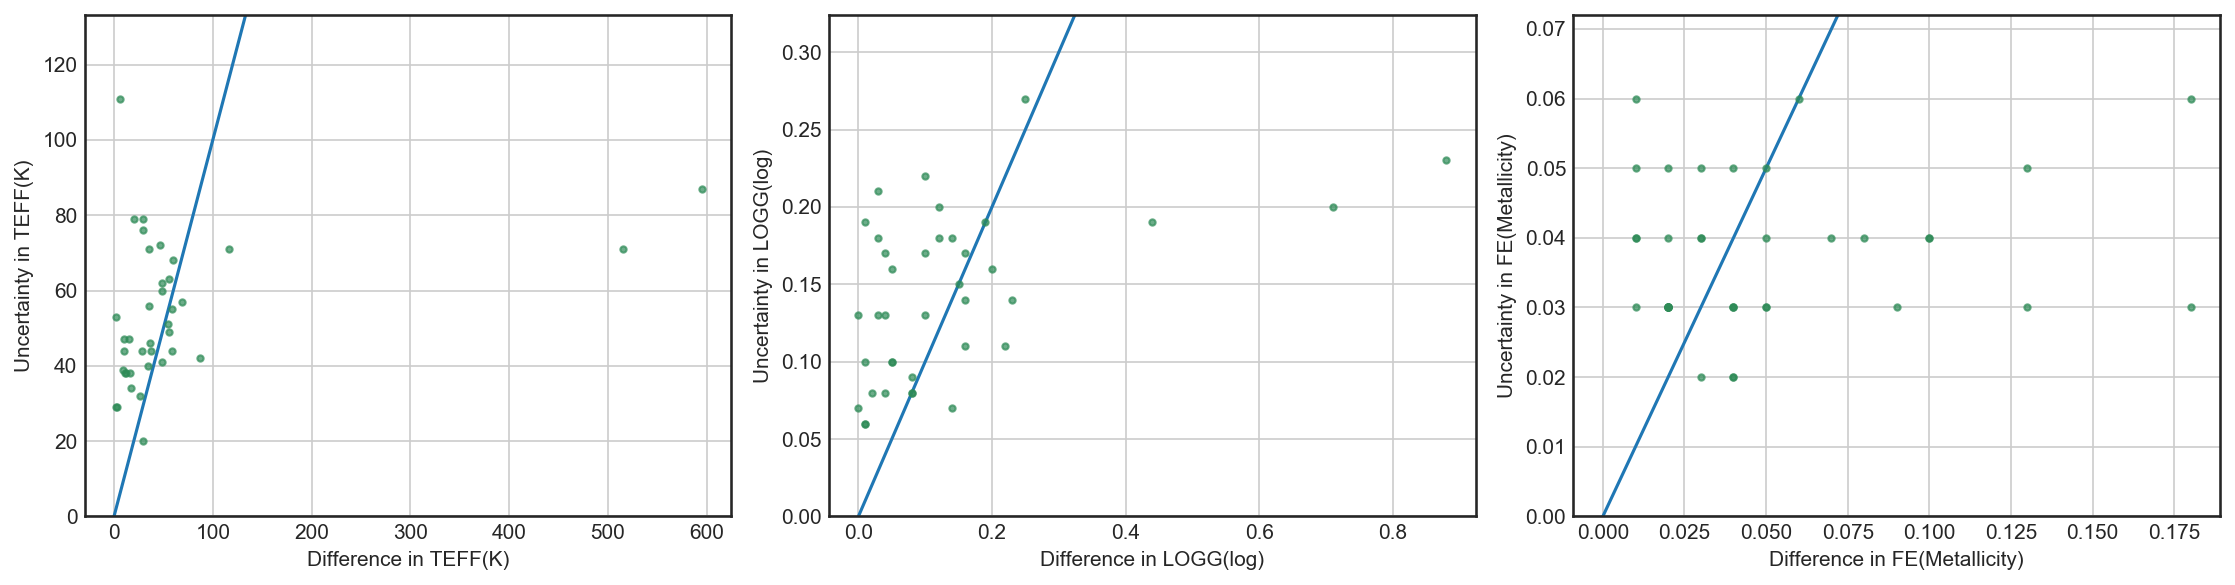

In [298]:
fig, axes = plt.subplots(1,3, figsize=(15,4), dpi = 150)
quantities = ['DELTATEFF', 'DELTALOGG', 'DELTAFE']
uncertainties = ['UTEFF', 'ULOGG', 'UFE']
units = ['K', 'log', 'Metallicity']
for idx,ax in enumerate(axes):
    print(quantities[idx])
    x = np.arange(np.max(cross_ref_df[quantities[idx]]), step= np.max(cross_ref_df[quantities[idx]])/10)
    print(x)
    ax.plot(x,x)
    ax.plot(cross_ref_df[quantities[idx]], cross_ref_df[uncertainties[idx]], '.', color = 'seagreen', alpha = 0.7)
    ax.set_xlabel("Difference in {}({})".format(quantities[idx][5:], units[idx]))
    ax.set_ylabel("Uncertainty in {}({})".format(quantities[idx][5:], units[idx]))
    ax.grid()
    ax.set_ylim(0,1.2*np.max(cross_ref_df[uncertainties[idx]]))
plt.tight_layout()